<a href="https://colab.research.google.com/github/Param-Bhatt/Stock-prediction-ML/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This program uses artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock of a corporation using past 60 day stock price

In [0]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from pandas.util.testing import assert_frame_equal
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
# Get the stock data
df = web.DataReader('MSFT',data_source='yahoo', start='2010-01-01',end='2020-04-10')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.100000,30.590000,30.620001,30.950001,38409100.0,24.294369
2010-01-05,31.100000,30.639999,30.850000,30.959999,49749600.0,24.302216
2010-01-06,31.080000,30.520000,30.879999,30.770000,58182400.0,24.153070
2010-01-07,30.700001,30.190001,30.629999,30.450001,50559700.0,23.901886
2010-01-08,30.879999,30.240000,30.280001,30.660000,51197400.0,24.066734
...,...,...,...,...,...,...
2020-04-03,157.380005,152.190002,155.100006,153.830002,41243300.0,153.830002
2020-04-06,166.500000,157.580002,160.320007,165.270004,67111700.0,165.270004
2020-04-07,170.000000,163.259995,169.589996,163.490005,62769000.0,163.490005


In [0]:
df.shape

(2585, 6)

Text(0, 0.5, 'Close Price USD $')

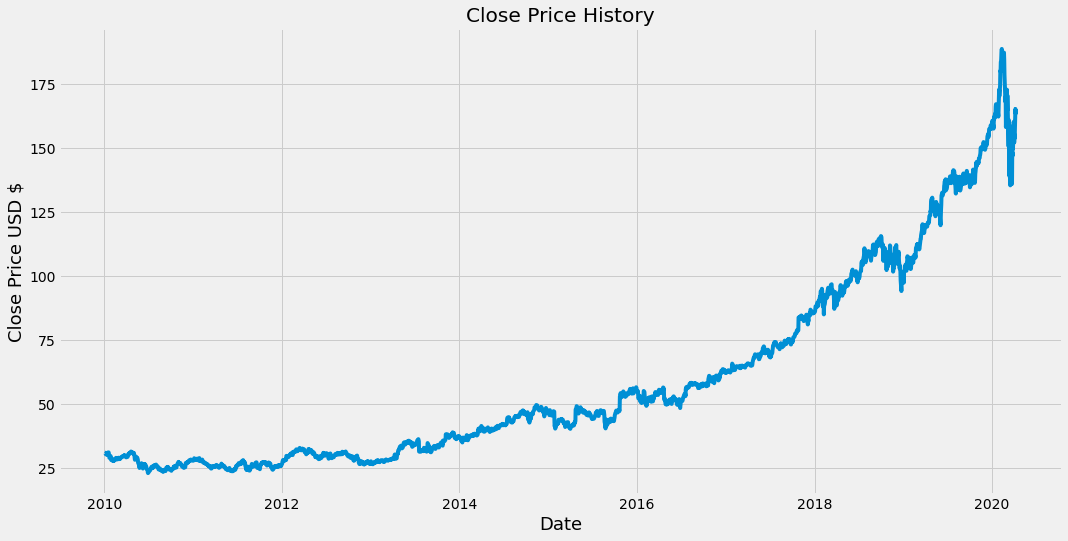

In [0]:
#Visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close']  )
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD $', fontsize = 18)

In [0]:
#Create a new dataframe with only the close column
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

2068

In [0]:
#Scale the data (Preprocessing)
scalar = MinMaxScaler(feature_range=(0, 1))
scaled_data = scalar.fit_transform(dataset)
scaled_data 

array([[0.04792082],
       [0.04798116],
       [0.04683445],
       ...,
       [0.84784844],
       [0.85774644],
       [0.85780676]])

In [0]:
#Create the training data set 
#Create the Scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the dataset into xtrain and ytrain
x_train = []
y_train = []
for i in range(180, len(train_data)):
  x_train.append(train_data[i-180:i, 0])
  y_train.append(train_data[i, 0]) 

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

NameError: ignored

In [0]:
#reshape the xtrain dataset to 3D as LSTM model takes input as a form of [number of samples, number of times steps, number of features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1888, 180, 1)

In [0]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5, verbose=1)

Epoch 1/5
1888/1888 [==============================] - 194s 103ms/step - loss: 2.1251e-04
Epoch 2/5
1888/1888 [==============================] - 195s 103ms/step - loss: 1.2334e-04
Epoch 3/5
1888/1888 [==============================] - 196s 104ms/step - loss: 1.1376e-04
Epoch 4/5
1888/1888 [==============================] - 196s 104ms/step - loss: 6.6495e-05
Epoch 5/5
1888/1888 [==============================] - 195s 103ms/step - loss: 6.3710e-05


In [0]:
#Create the testing dataset 
#Create the new array containing the scaled values from index 3620 to 
test_data = scaled_data[training_data_len - 180: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(180, len(test_data)):
  x_test.append(test_data[i-180 : i, 0])

In [0]:
#Convert the data into the numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(517, 180, 1)

In [0]:
#Get the models to predict values
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

In [0]:
#Get the RMSE
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.0723795388426276

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


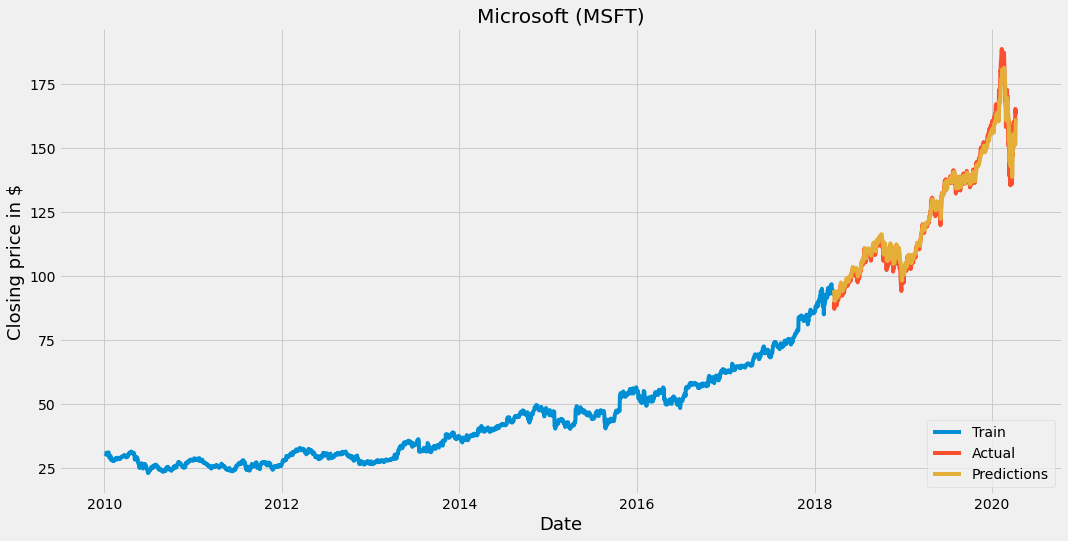

In [0]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len : ]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Microsoft (MSFT)')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price in $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted value
valid[400:450]

,Close,Predictions
Date,,
2019-10-23,137.240005,137.048477
2019-10-24,139.940002,137.426758
2019-10-25,140.729996,139.531357
2019-10-28,144.190002,140.704681
2019-10-29,142.830002,143.180054
2019-10-30,144.610001,142.736542
2019-10-31,143.369995,143.471176
2019-11-01,143.720001,142.749329
2019-11-04,144.550003,142.708832


In [0]:
#Check the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17' )
#Create new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days of closing  price values and convert the dataframe to an array
last_60_days = new_df[-180 : ].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test to numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[252.16122]]


In [0]:
#Get the actual value
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18' )
apple_quote['Close']

Date
2019-12-18    279.73999
Name: Close, dtype: float64